In [2]:
%matplotlib notebook

In [3]:
#Set Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Set CSV file path

space_track_boxscore = "../CSV_Input/space_track_boxscore.csv"

boxscore_df = pd.read_csv(space_track_boxscore)
boxscore_df["COUNTRY"] = boxscore_df["COUNTRY"].str.upper() 
boxscore_df.loc[boxscore_df["COUNTRY"]=="UNITED STATES OF AMERICA", "COUNTRY"]= "UNITED STATES"
boxscore_df.loc[boxscore_df["COUNTRY"]=="ARAB SATELLITE COMMUNICATIONS ORGANIZATION", "COUNTRY"]= "ARAB WORLD"
boxscore_df.head()

,COUNTRY,SPADOC_CD,ORBITAL_TBA,ORBITAL_PAYLOAD_COUNT,ORBITAL_ROCKET_BODY_COUNT,ORBITAL_DEBRIS_COUNT,ORBITAL_TOTAL_COUNT,DECAYED_PAYLOAD_COUNT,DECAYED_ROCKET_BODY_COUNT,DECAYED_DEBRIS_COUNT,DECAYED_TOTAL_COUNT,COUNTRY_TOTAL
0,ALGERIA,ALG,0,6,0,0,6,0,0,0,0,6
1,ALL,ALL,138,6141,2247,13020,21546,3564,3942,17621,25127,46673
2,ARAB WORLD,AB,0,14,0,0,14,1,0,0,1,15
3,ARGENTINA,ARGN,0,24,0,1,25,2,0,0,2,27
4,ASIASAT CORP,AC,0,8,0,0,8,0,0,0,0,8


In [3]:
country = boxscore_df["COUNTRY"]
orb_tba = boxscore_df["ORBITAL_TBA"]
orb_payload = boxscore_df["ORBITAL_PAYLOAD_COUNT"]
orb_rocket = boxscore_df["ORBITAL_ROCKET_BODY_COUNT"]
orb_debris = boxscore_df["ORBITAL_DEBRIS_COUNT"]
orb_total = boxscore_df["ORBITAL_TOTAL_COUNT"]
decayed_payload = boxscore_df["DECAYED_PAYLOAD_COUNT"]
decayed_rocket_bod= boxscore_df["DECAYED_ROCKET_BODY_COUNT"]
decayed_debris = boxscore_df["DECAYED_DEBRIS_COUNT"]
decayed_total = boxscore_df["DECAYED_TOTAL_COUNT"]
total = boxscore_df["COUNTRY_TOTAL"]


orb_dec_df = pd.DataFrame({"Country": country,
                           "Orbital TBA": orb_tba,
                           "Orbital Payload Count": orb_payload,
                           "Orbital Rock Body Count": orb_rocket,
                           "Orbital Debris Count": orb_debris,
                           "Orbital Total":orb_total,
                           "Decayed Payload": decayed_payload,
                           "Decayed Rocket Body Count": decayed_rocket_bod,
                           "Decayed Debris Count" : decayed_debris,
                           "Decayed Total" : decayed_total,
                           "Total": total})


orbital_styled = orb_dec_df.style.set_properties(**{'text-align': 'left'})
orbital_styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
orbital_styled


,Country,Orbital TBA,Orbital Payload Count,Orbital Rock Body Count,Orbital Debris Count,Orbital Total,Decayed Payload,Decayed Rocket Body Count,Decayed Debris Count,Decayed Total,Total
0,ALGERIA,0,6,0,0,6,0,0,0,0,6
1,ALL,138,6141,2247,13020,21546,3564,3942,17621,25127,46673
2,ARAB WORLD,0,14,0,0,14,1,0,0,1,15
3,ARGENTINA,0,24,0,1,25,2,0,0,2,27
4,ASIASAT CORP,0,8,0,0,8,0,0,0,0,8
5,AUSTRALIA,0,22,2,0,24,5,0,0,5,29
6,AUSTRIA,0,3,0,0,3,0,0,0,0,3
7,AZERBAIJAN,0,3,0,0,3,0,0,0,0,3
8,BELARUS,0,2,0,0,2,0,0,0,0,2
9,BELGIUM,0,6,0,0,6,0,0,0,0,6


In [4]:
gdp_csv = "../CSV_Input/gdp_csv.csv"

gdp_df = pd.read_csv(gdp_csv)

gdp_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [5]:
country_name = gdp_df.loc[gdp_df["Year"]==2016]["Country Name"]
value = gdp_df.loc[gdp_df["Year"]==2016]["Value"]
#year = gdp_df["Year"]

#current_gdp_df = gdp_df.groupby("Country Name")["Year"].max()
cleaned_gdp_df = pd.DataFrame({"Country":country_name,
                               "Value":value})

#cleaned_gdp_df.rename(columns={"Country Name":"Country"})

sort_gdp = cleaned_gdp_df.sort_values(["Country"], ascending=True)

sort_gdp["Country"] = sort_gdp["Country"].str.upper() 


sorted_styled = sort_gdp.style.set_properties(**{'text-align': 'left'})
sorted_styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
sorted_styled


,Country,Value
2343,AFGHANISTAN,19469022207.685200
2376,ALBANIA,11863865978.094200
2433,ALGERIA,159049096745.248993
2448,AMERICAN SAMOA,658000000.000000
2495,ANDORRA,2858517699.115040
2527,ANGOLA,95335111741.202499
2567,ANTIGUA AND BARBUDA,1460144703.703700
48,ARAB WORLD,2504702625568.629883
2622,ARGENTINA,545476103427.247009
2649,ARMENIA,10572298341.561800


In [12]:
space_trash_df = pd.merge(orb_dec_df, sort_gdp, how='inner', on='Country')

sorted_trash = space_trash_df.style.set_properties(**{'text-align': 'left'})
sorted_trash.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
sorted_trash


,Country,Orbital TBA,Orbital Payload Count,Orbital Rock Body Count,Orbital Debris Count,Orbital Total,Decayed Payload,Decayed Rocket Body Count,Decayed Debris Count,Decayed Total,Total,Value
0,ALGERIA,0,6,0,0,6,0,0,0,0,6,159049096745.248993
1,ARAB WORLD,0,14,0,0,14,1,0,0,1,15,2504702625568.629883
2,ARGENTINA,0,24,0,1,25,2,0,0,2,27,545476103427.247009
3,AUSTRALIA,0,22,2,0,24,5,0,0,5,29,1204616439828.409912
4,AUSTRIA,0,3,0,0,3,0,0,0,0,3,390799991147.467957
5,AZERBAIJAN,0,3,0,0,3,0,0,0,0,3,37847715736.040604
6,BELARUS,0,2,0,0,2,0,0,0,0,2,47407217531.162003
7,BELGIUM,0,6,0,0,6,0,0,0,0,6,467955709817.539001
8,BOLIVIA,0,1,0,0,1,0,0,0,0,1,33806395513.748199
9,BRAZIL,0,17,0,0,17,3,0,0,3,20,1796186586414.449951


In [14]:
space_trash_df.to_csv("../CSV_Output/space_trash.csv", encoding="utf-8")

In [15]:
#Set (launch_date) CSV file path
launch_date = "../CSV_Input/launch_date.csv"
launch_date_df = pd.read_csv(launch_date)
launch_date_df

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-23T19:17:33,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,2859382,164066527,0 TBA - TO BE ASSIGNED,1 89496U 20297.21525868 +.00002917 +0...,2 89496 098.9034 296.0040 0095466 195.0041 164...
1,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-23T19:17:33,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,2859382,164066834,0 TBA - TO BE ASSIGNED,1 89494U 20297.27964159 +.00000726 +0...,2 89494 099.1682 320.7768 0092761 251.7170 107...
2,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-23T19:17:33,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,2859382,164066374,0 TBA - TO BE ASSIGNED,1 89493U 20296.27527379 +.00000668 +0...,2 89493 099.1682 319.7504 0092222 254.5059 104...
3,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-23T19:17:33,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,2859382,164066690,0 TBA - TO BE ASSIGNED,1 89492U 20296.82185962 +.00000719 +0...,2 89492 082.5289 141.6437 0030450 308.0832 051...
4,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-23T19:17:33,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,2859382,164066487,0 TBA - TO BE ASSIGNED,1 89490U 20297.22498995 +.00001601 +0...,2 89490 098.3554 291.2873 0131712 305.7862 053...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45027,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-24T06:36:10,18 SPCS,CZ-3B R/B,2020-071B,EARTH,TEME,UTC,SGP4,...,NaN,PRC,2020-10-11,XSC,NaN,2859690,164114424,0 CZ-3B R/B,1 46611U 20071B 20298.02697297 .00021924 -1...,2 46611 28.4595 267.4964 7235272 186.6974 151...
45028,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-24T03:03:54,18 SPCS,GAOFEN 13,2020-071A,EARTH,TEME,UTC,SGP4,...,NaN,PRC,2020-10-11,XSC,NaN,2859572,164111623,0 GAOFEN 13,1 46610U 20071A 20297.92598891 -.00000380 +0...,2 46610 001.9797 282.2780 0003075 281.0620 280...
45029,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-17T23:06:09,18 SPCS,SL-4 R/B,2020-072B,EARTH,TEME,UTC,SGP4,...,NaN,CIS,2020-10-14,TTMTR,2020-10-18,2855314,163689766,0 SL-4 R/B,1 46614U 20072B 20291.93175791 .09431700 1...,2 46614 51.6342 98.9357 0003083 72.6657 64...
45030,2.0,GENERATED VIA SPACE-TRACK.ORG API,2020-10-23T19:20:01,18 SPCS,SOYUZ MS-17,2020-072A,EARTH,TEME,UTC,SGP4,...,NaN,CIS,2020-10-14,TTMTR,NaN,2859383,164087111,0 SOYUZ MS-17,1 46613U 20072A 20297.52476417 +.00001134 +0...,2 46613 051.6446 073.4482 0001638 052.4432 352...


In [16]:
# Create a clean DataFrame by dropping the NaN its launch_date.
cleaned_launch_date_df = launch_date_df.dropna()
cleaned_launch_date_df.head(10)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
602,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-08-15T23:35:23,18 SPCS,SPUTNIK 3,1958-004B,EARTH,TEME,UTC,SGP4,...,LARGE,CIS,1958-05-15,TTMTR,1960-04-06,33906,8671641,0 SPUTNIK 3,1 00008U 58004 B 60095.16166626 .02607090 +0...,2 00008 065.0599 163.5585 0088318 135.6760 224...
606,2.0,GENERATED VIA SPACE-TRACK.ORG API,2007-10-23T12:31:05,18 SPCS,VANGUARD DEB,1959-001D,EARTH,TEME,UTC,SGP4,...,SMALL,US,1959-02-17,AFETR,2007-10-23,466483,63666446,0 VANGUARD DEB,1 14934U 59001D 07295.38021046 .04304013 2...,2 14934 032.7805 031.3996 0003188 063.3365 340...
607,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-08-15T23:35:26,18 SPCS,THOR ABLE R/B,1959-004B,EARTH,TEME,UTC,SGP4,...,SMALL,US,1959-08-07,AFETR,1961-06-30,33907,8672451,0 THOR ABLE R/B,1 00017U 59004 B 61008.85131000 .00070225 +0...,2 00017 047.1000 284.3200 7526400 171.0000 203...
613,2.0,GENERATED VIA SPACE-TRACK.ORG API,2015-02-02T07:20:19,18 SPCS,VANGUARD 3 DEB,1959-007B,EARTH,TEME,UTC,SGP4,...,SMALL,US,1959-09-18,AFETR,2015-02-04,1820118,98244565,0 VANGUARD 3 DEB,1 29005U 59007B 15032.72027226 .05224532 0...,2 29005 033.2086 169.8816 0062677 150.8424 209...
614,2.0,GENERATED VIA SPACE-TRACK.ORG API,2014-12-23T06:41:41,18 SPCS,VANGUARD 3 DEB,1959-007C,EARTH,TEME,UTC,SGP4,...,SMALL,US,1959-09-18,AFETR,2014-04-03,1798056,97866671,0 VANGUARD 3 DEB,1 31405U 59007C 13260.81415172 .00147331 0...,2 31405 033.3140 153.5267 0807037 034.1955 330...
615,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-08-17T14:36:51,18 SPCS,JUNO II R/B,1959-009B,EARTH,TEME,UTC,SGP4,...,MEDIUM,US,1959-10-13,AFETR,1989-07-16,34586,16282820,0 JUNO II R/B,1 00023U 59009 B 89195.78596028 .02731772 +1...,2 00023 050.2674 226.9734 0018343 032.5712 327...
620,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-08-16T23:16:11,18 SPCS,THOR ABLE DEB (YO),1960-002C,EARTH,TEME,UTC,SGP4,...,MEDIUM,US,1960-04-01,AFETR,1983-04-17,34350,12985090,0 THOR ABLE DEB (YO),1 00101U 60002 C 83106.81622310 .09665547 +5...,2 00101 048.4727 027.9990 0000398 270.9061 249...
622,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-08-17T14:45:00,18 SPCS,THOR ABLE R/B,1960-002A,EARTH,TEME,UTC,SGP4,...,LARGE,US,1960-04-01,AFETR,1991-07-03,34749,17927895,0 THOR ABLE R/B,1 00028U 60002 A 91183.48209206 .20810904 +5...,2 00028 048.3426 203.3369 0003628 333.1829 026...
623,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-08-15T23:41:56,18 SPCS,THOR ABLESTAR DEB,1960-003D,EARTH,TEME,UTC,SGP4,...,SMALL,US,1960-04-13,AFETR,1979-07-15,34037,10559509,0 THOR ABLESTAR DEB,1 00099U 60003 D 79186.84178960 .01646730 +2...,2 00099 051.2611 217.5480 0004728 097.4296 263...
642,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-05-28T19:18:50,18 SPCS,THOR ABLESTAR DEB,1960-007E,EARTH,TEME,UTC,SGP4,...,SMALL,US,1960-06-22,AFETR,2002-11-29,7021,4153174,0 THOR ABLESTAR DEB,1 841U 60007E 02332.70793779 +.10389536 +6...,2 841 066.6181 227.1335 0012307 205.0707 154...


In [17]:
#Generate a summary statistics table
launch_date = cleaned_launch_date_df["LAUNCH_DATE"]
country_code = cleaned_launch_date_df["COUNTRY_CODE"]
size = cleaned_launch_date_df["RCS_SIZE"]
decay_date = cleaned_launch_date_df["DECAY_DATE"]
#Create data frame
summary_stats_df = pd.DataFrame({"Launch Date": launch_date,
                                "Country": country_code,
                                "Size": size,
                                "Decay Date": decay_date})
#print
summary_stats_df

,Launch Date,Country,Size,Decay Date
602,1958-05-15,CIS,LARGE,1960-04-06
606,1959-02-17,US,SMALL,2007-10-23
607,1959-08-07,US,SMALL,1961-06-30
613,1959-09-18,US,SMALL,2015-02-04
614,1959-09-18,US,SMALL,2014-04-03
...,...,...,...,...
44784,2020-09-03,US,MEDIUM,2020-09-29
44785,2020-09-03,US,SMALL,2020-09-28
44786,2020-09-03,US,MEDIUM,2020-09-28
44787,2020-09-03,US,MEDIUM,2020-09-29


In [ ]:
summary_stats_df.to_csv("../CSV_Output/l.csv", encoding="utf-8")

In [13]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "../CSV_Output/launch_data_analysis.csv"
launch_df = pd.read_csv(csv_path)

launch_df[["Year", "Month", "Day"]]= launch_df["Launch Date"].str.split ("-", expand = True)
launch_df = launch_df [["Country", "Year", "Size", "Decay Date"]]
launch_df["Year"]= pd.to_numeric(launch_df["Year"])
launch_df

,Country,Year,Size,Decay Date
0,CIS,1958,LARGE,1960-04-06
1,US,1959,SMALL,2007-10-23
2,US,1959,SMALL,1961-06-30
3,US,1959,SMALL,2015-02-04
4,US,1959,SMALL,2014-04-03
...,...,...,...,...
16152,US,2020,MEDIUM,2020-09-29
16153,US,2020,SMALL,2020-09-28
16154,US,2020,MEDIUM,2020-09-28
16155,US,2020,MEDIUM,2020-09-29


In [41]:
# Create bins in which to place values based on years
bins = [0, 1964, 1970, 1976, 1982, 1988,
        1994, 2000, 2006, 2012, 2018, 2020]

# Create labels for these bins
group_labels = ["1958-63", "1964-69", "1970-75", "1976-81", "1982-87", "1988-93",
                "1994-99", "2000-05", "2006-11", "2012-17", "2018-40"]

In [42]:
# Slice the data and place it into bins
pd.cut(launch_df["Year"], bins, labels=group_labels).head()

0    1958-63
1    1958-63
2    1958-63
3    1958-63
4    1958-63
Name: Year, dtype: category
Categories (11, object): [1958-63 < 1964-69 < 1970-75 < 1976-81 ... 2000-05 < 2006-11 < 2012-17 < 2018-40]

In [43]:
# Place the data series into a new column inside of the DataFrame
launch_df["View Group"] = pd.cut(launch_df["Year"], bins, labels=group_labels)
launch_df

,Country,Year,Size,Decay Date,View Group
0,CIS,1958,LARGE,1960-04-06,1958-63
1,US,1959,SMALL,2007-10-23,1958-63
2,US,1959,SMALL,1961-06-30,1958-63
3,US,1959,SMALL,2015-02-04,1958-63
4,US,1959,SMALL,2014-04-03,1958-63
...,...,...,...,...,...
16152,US,2020,MEDIUM,2020-09-29,2018-40
16153,US,2020,SMALL,2020-09-28,2018-40
16154,US,2020,MEDIUM,2020-09-28,2018-40
16155,US,2020,MEDIUM,2020-09-29,2018-40


In [44]:
bar_count = launch_df["View Group"].value_counts()
bar_count = bar_count.sort_index()
bar_count

1958-63     280
1964-69    1068
1970-75    1066
1976-81    1810
1982-87    3457
1988-93    2917
1994-99    2349
2000-05    1698
2006-11     716
2012-17     486
2018-40     310
Name: View Group, dtype: int64

<IPython.core.display.Javascript object>


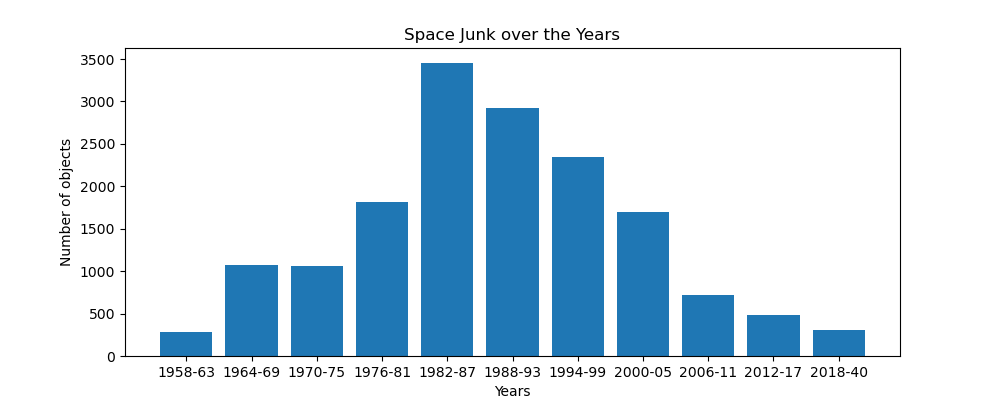

Text(0.5, 1.0, 'Space Junk over the Years')

In [55]:
#bar_count.plot(kind= "bar", figsize=(10,8))
plt.figure(figsize=(10,4))
plt.bar(bar_count.index.values,bar_count.values,)
plt.xlabel("Years")
plt.ylabel("Number of objects")
plt.title("Space Junk over the Years")


In [56]:
plt.savefig("../csv_output/Bargraph.png")

groupby by size... then .count()